In [1]:
import numpy as np
import pandas as pd
from pandas import pivot_table
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import json

%matplotlib inline

In [2]:
borig = pd.read_csv('2018clean3.csv', header=0, index_col=0, dtype={'MainSic': object})

print(borig.shape)
borig.head(2)

(10772, 29)


,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted,Post,Val,MainSic,MainSection
0,"BRYANSTON SCHOOL,INCORPORATED","Bryanston House,\r\r\r\r\nBlandford,\r\r\r\r\n...",00226143,85310,19.6,32.5,NaN,NaN,0.0,0.0,...,Michael McGovern (Chief Operating Officer),500 to 999,"""Bryanston School"",Incorporated",False,05/04/2019 00:00:00,03/04/2019 13:43:34,DT11 0PX,True,85310,Education
1,"RED BAND CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\r\r\r\nLeith Walk,\r\r\r\r...",SC016876,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,...,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2019 00:00:00,01/04/2019 12:37:21,EH6 8NU,True,47730,Wholesale and retail trade; repair of motor ve...


In [6]:
county_shp = 'NUTS_Level_2_January_2018_Full_Clipped_Boundaries_in_the_United_Kingdom.shp'
county_df = gpd.read_file(county_shp)

print(county_df.shape)
county_df.head()

(41, 10)


,objectid,nuts218cd,nuts218nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,UKC1,Tees Valley and Durham,414643,532242,-1.77440,54.685020,3.026249e+09,487438.014517,(POLYGON ((-1.737033618785907 54.9184631898649...
1,2,UKC2,Northumberland and Tyne and Wear,398898,602530,-2.01892,55.316841,5.566181e+09,751311.485119,(POLYGON ((-2.024151451980134 55.7711741685706...
2,3,UKD1,Cumbria,341868,527389,-2.90218,54.638260,6.822195e+09,987066.701024,(POLYGON ((-2.675590620680368 55.1733220183547...
3,4,UKD3,Greater Manchester,377940,401102,-2.33407,53.506149,1.275981e+09,248705.119145,"POLYGON ((-2.13224594777332 53.68404821070088,..."
4,5,UKD4,Lancashire,363669,441026,-2.55392,53.864182,3.076413e+09,795004.920936,(POLYGON ((-2.459141139619598 54.2367471854683...


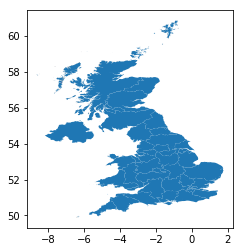

In [7]:
county_df.plot()

In [8]:
print(county_df.nuts218nm.tolist())

['Tees Valley and Durham', 'Northumberland and Tyne and Wear', 'Cumbria', 'Greater Manchester', 'Lancashire', 'Cheshire', 'Merseyside', 'East Yorkshire and Northern Lincolnshire', 'North Yorkshire', 'South Yorkshire', 'West Yorkshire', 'Derbyshire and Nottinghamshire', 'Leicestershire, Rutland and Northamptonshire', 'Lincolnshire', 'Herefordshire, Worcestershire and Warwickshire', 'Shropshire and Staffordshire', 'West Midlands', 'East Anglia', 'Bedfordshire and Hertfordshire', 'Essex', 'Inner London - West', 'Inner London - East', 'Outer London - East and North East', 'Outer London - South', 'Outer London - West and North West', 'Berkshire, Buckinghamshire and Oxfordshire', 'Surrey, East and West Sussex', 'Hampshire and Isle of Wight', 'Kent', 'Gloucestershire, Wiltshire and Bath/Bristol area', 'Dorset and Somerset', 'Cornwall and Isles of Scilly', 'Devon', 'West Wales', 'East Wales', 'North Eastern Scotland', 'Highlands and Islands', 'Eastern Scotland', 'West Central Scotland', 'South

In [9]:
print(county_df.nuts218cd.tolist())

['UKC1', 'UKC2', 'UKD1', 'UKD3', 'UKD4', 'UKD6', 'UKD7', 'UKE1', 'UKE2', 'UKE3', 'UKE4', 'UKF1', 'UKF2', 'UKF3', 'UKG1', 'UKG2', 'UKG3', 'UKH1', 'UKH2', 'UKH3', 'UKI3', 'UKI4', 'UKI5', 'UKI6', 'UKI7', 'UKJ1', 'UKJ2', 'UKJ3', 'UKJ4', 'UKK1', 'UKK2', 'UKK3', 'UKK4', 'UKL1', 'UKL2', 'UKM5', 'UKM6', 'UKM7', 'UKM8', 'UKM9', 'UKN0']


## Postcode to NUTS2 append

In [10]:
addnuts = pd.read_csv('pc2018_uk_NUTS-2016_v2.0.csv', sep=';')

print(addnuts.shape)
addnuts.head()

(1759911, 2)


,NUTS3,CODE
0,'UKM73','EH10 7DP'
1,'UKM73','EH10 7DX'
2,'UKM73','EH10 7DY'
3,'UKM73','EH10 7DZ'
4,'UKM73','EH10 7EA'


In [11]:
def remove_quotes(x):
    return str(x)[1:-1]

In [12]:
addnuts['NUTS3'] = addnuts['NUTS3'].apply(remove_quotes)
addnuts['CODE'] = addnuts['CODE'].apply(remove_quotes)

addnuts.head()

,NUTS3,CODE
0,UKM73,EH10 7DP
1,UKM73,EH10 7DX
2,UKM73,EH10 7DY
3,UKM73,EH10 7DZ
4,UKM73,EH10 7EA


In [13]:
def ret_nuts2(x):
    return str(x)[:-1]

In [14]:
addnuts['NUTS2'] = addnuts['NUTS3'].apply(ret_nuts2)

addnuts.head()

,NUTS3,CODE,NUTS2
0,UKM73,EH10 7DP,UKM7
1,UKM73,EH10 7DX,UKM7
2,UKM73,EH10 7DY,UKM7
3,UKM73,EH10 7DZ,UKM7
4,UKM73,EH10 7EA,UKM7


In [15]:
print(len(addnuts['NUTS2'].unique()))
addnuts['NUTS2'].unique()

42


array(['UKM7', 'UKL1', 'UKM9', 'UKD7', 'UKD1', 'UKD3', 'UKC2', 'UKH2',
       'UKH3', 'UKJ2', 'UKK2', 'UKH1', 'UKI3', 'UKI4', 'UKJ3', 'UKI5',
       'UKI6', 'UKI7', 'UKJ4', 'UKL2', 'UKC1', 'UKG3', 'UKJ1', 'UKM8',
       'UKM6', 'UKK4', 'UKF2', 'UKE1', 'UKG1', 'UKE4', 'UKD4', 'UKK1',
       'UKF1', 'UKD6', 'UKE2', 'UKF3', 'UKE3', 'UKM5', 'UKG2', 'UKK3',
       'UKN0', 'UKN1'], dtype=object)

In [16]:
addnuts = addnuts[['CODE', 'NUTS2']]
addnuts.rename(columns={"CODE": "Post", "NUTS2": "Nuts2"}, inplace=True)

addnuts.head()

,Post,Nuts2
0,EH10 7DP,UKM7
1,EH10 7DX,UKM7
2,EH10 7DY,UKM7
3,EH10 7DZ,UKM7
4,EH10 7EA,UKM7


In [17]:
borig = pd.merge(borig, addnuts, on='Post')

borig.sample(2)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted,Post,Val,MainSic,MainSection,Nuts2
9623,THE ROYAL MASONIC BENEVOLENT INSTITUTION CARE ...,"60 Great Queen Street,\r\r\r\r\nLondon,\r\r\r\...",01293566,87100,15.0,5.1,0.0,0.0,0.0,0.5,...,1000 to 4999,THE ROYAL MASONIC BENEVOLENT INSTITUTION CARE ...,False,05/04/2019 00:00:00,01/02/2019 13:41:21,WC2B 5AZ,True,87100,Human health and social work activities,UKI3
6380,LONDON UNDERGROUND LIMITED,"55 Broadway,\r\r\r\r\nLondon,\r\r\r\r\nUnited ...",01900907,49311,12.7,21.7,9.0,0.0,93.3,89.8,...,"5000 to 19,999",LONDON UNDERGROUND LIMITED,False,05/04/2019 00:00:00,27/03/2019 09:55:43,SW1H 0BD,True,49311,Transportation and storage,UKI3


In [18]:
ldn_piv = pivot_table(borig, values='DiffMeanHourlyPercent',
                     index=['Nuts2'], aggfunc=np.mean)


ldn_piv.rename(columns={'DiffMeanHourlyPercent':'Diff_avg'}, inplace=True)
ldn_piv.sort_values(by=['Diff_avg'], ascending=False, inplace=True)
ldn_piv.reset_index(inplace=True)

ldn_piv.head()

,Nuts2,Diff_avg
0,UKM5,17.971233
1,UKI3,17.051724
2,UKI6,16.653788
3,UKH3,15.974299
4,UKI4,15.819089


In [19]:
county_short = county_df.copy()
county_short = county_short[['nuts218cd', 'nuts218nm', 'lat', 'long', 'geometry']]
county_short.rename(columns={'nuts218cd':'Nuts2', 'nuts218nm': 'name', 'long': 'lon'}, inplace=True)
ldn_piv = pd.merge(ldn_piv, county_short, on='Nuts2')

ldn_piv.head(2)

,Nuts2,Diff_avg,name,lat,lon,geometry
0,UKM5,17.971233,North Eastern Scotland,57.223869,-2.64976,(POLYGON ((-2.792263088835554 57.7004555931742...
1,UKI3,17.051724,Inner London - West,51.518639,-0.16383,(POLYGON ((-0.1661887358376487 51.572791946112...


In [20]:
ldn_piv = ldn_piv[['geometry']]

print(type(ldn_piv))
ldn_piv.head(2)

<class 'pandas.core.frame.DataFrame'>


,geometry
0,(POLYGON ((-2.792263088835554 57.7004555931742...
1,(POLYGON ((-0.1661887358376487 51.572791946112...


In [21]:
ldn_geo = gpd.GeoDataFrame(ldn_piv)

print(type(ldn_geo))
ldn_geo.head(2)

<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry
0,(POLYGON ((-2.792263088835554 57.7004555931742...
1,(POLYGON ((-0.1661887358376487 51.572791946112...


In [22]:
# f, ax = plt.subplots(1, figsize=(8, 8))
# ax = ldn_geo.plot(column='Diff_avg', cmap='Reds', ax=ax)
# plt.show()

In [23]:
# ldn_geo.to_file("ldn_geojson_file", driver = "GeoJSON")

In [24]:
map_shp = 'map.shp'
map_df = gpd.read_file(map_shp)

print(map_df.shape)
map_df.head()

(192, 1)


,geometry
0,POLYGON ((-3.679454493748835 57.09550845318427...
1,(POLYGON ((-6.456943677077106 58.1306964278733...
2,POLYGON ((-3.079321608505779 56.47496134984158...
3,(POLYGON ((-1.455113814048218 60.3183202321033...
4,(POLYGON ((-2.96638815745564 58.98152967735905...


In [25]:
# print(map_df.iloc[0,0])

In [26]:
test_df = map_df[:10]

In [27]:
# test_df.to_file("test_geojson_file", driver = "GeoJSON")

In [28]:
eng_shp = 'Limited_English_Proficiency.shp'
eng_df = gpd.read_file(eng_shp)

print(eng_df.shape)
eng_df.head()

(171, 1)


,geometry
0,POLYGON ((-122.7510410003212 45.58899699982094...
1,"POLYGON ((-122.743790999497 45.49230199978773,..."
2,POLYGON ((-122.5737230009364 45.55444300002641...
3,POLYGON ((-122.4964559999942 45.52220100059802...
4,POLYGON ((-122.4647909997784 45.49286100012013...


In [29]:
with open("test_geojson_file") as geofile:
    geojson_layer = json.load(geofile)

In [30]:
# for i in geojson_layer['features']:
#     print(i)

In [31]:
nuts_df # grab 1st

,objectid,nuts118cd,nuts118nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,UKC,North East (England),417313,600358,-1.728900,55.297031,8.592429e+09,1.008435e+06,(POLYGON ((-2.024151451980134 55.7711741685706...
1,2,UKD,North West (England),350015,506280,-2.772370,54.449451,1.416409e+10,2.075324e+06,(POLYGON ((-2.675590620680368 55.1733220183547...
2,3,UKE,Yorkshire and The Humber,446903,448736,-1.287120,53.932640,1.540912e+10,1.385386e+06,(POLYGON ((-0.790730892883332 54.5589697923404...
3,4,UKF,East Midlands (England),477660,322635,-0.849670,52.795719,1.564327e+10,1.332317e+06,(POLYGON ((-0.2997641897034416 53.614706699691...
4,5,UKG,West Midlands (England),386294,295477,-2.203580,52.556969,1.300374e+10,9.539014e+05,POLYGON ((-1.958916299467313 53.21667771171843...
5,6,UKH,East of England,571074,263229,0.504146,52.240669,1.913556e+10,2.646573e+06,(POLYGON ((0.9906408894588158 52.9783850680571...
6,7,UKI,London,517516,178392,-0.308640,51.492271,1.573510e+09,4.202000e+05,(POLYGON ((-0.09686229700769114 51.69055427763...
7,8,UKJ,South East (England),470062,172924,-0.993110,51.450970,1.908876e+10,2.443292e+06,(POLYGON ((-0.6821291665320552 52.195856590741...
8,9,UKK,South West (England),285015,102567,-3.633430,50.811192,2.385137e+10,3.400380e+06,(POLYGON ((-1.762504169832054 52.1073426651031...
9,10,UKL,Wales,263406,242881,-3.994160,52.067410,2.078213e+10,3.082421e+06,(POLYGON ((-3.32217970820852 53.35686518738494...


In [33]:
with open("Counties_December_2017_Generalised_Clipped_Boundaries_in_England.geojson") as geofile:
    geojson_layer = json.load(geofile)

In [36]:
counter = 0

for i in geojson_layer['features']:
    counter += 1
    
print(counter)

27


In [38]:
len(geojson_layer['features'])

27